# Introduction

Data Science is an up and coming field with applications in just about every industry. Computer Science is a central component of data science since programming allows us to apply analysis techniques to the large and diverse data sets that arise in real-world applications. In this lab, you will have a chance to dabble in data science by analyzing data about Airbnb listings in San Francisco. Data Science involves analyzing large data sets and drawing conclusions from them through exploration, prediction, and inference. In this lab we will focus on exploratory data analysis and will be split into three core components: 
1. Understanding and cleaning the data 
2. Analyzing the data 
3. Data visualization 

While all of the code below can also be run in Snap!, it is more efficient and easier to run in Python as you will see over the course of this lab. 

For this lab, we will be using a new interface called the iPython notebook (which you are in right now!) It is just a more convenient, web-based interactive environment where you can combine code execution, text, mathematics,
plots and media into a single document. This is a brief tutorial on how to use iPython notebooks - http://cs231n.github.io/ipython-tutorial/ 

Note: You can edit the code inline. Once you write your code in a cell press shift + enter to run it. Once you are done with the lab, press File > Save and Checkpoint to store your code. 

### Understanding and cleaning the Data 

The first step to exploratory data analysis is understanding what data points you have and cleaning it up to make it into a usable format. Run the following cell to load in the data.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datascience import *

The import statements above are used to import different libraries in Python into this iPython environment. A "library" in Python is a collection of additional tools and functions. 

Most of the data that you find online is typically in a 'csv' format ('csv' stands for comma separated values). Python makes it very easy to convert these values into a readable Table using the commands shown below. 

To do this in Snap you can use the blocks below: 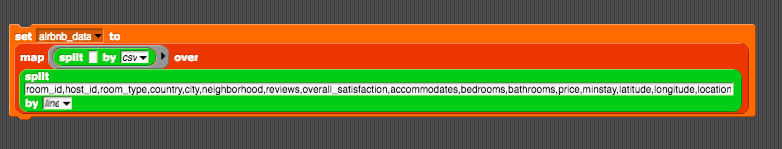

In [5]:
airbnb_data = Table.read_table('airbnb_sf.csv')
airbnb_data

room_id  | host_id  | room_type   | country | city          | neighborhood          | reviews | overall_satisfaction | accommodates | bedrooms | bathrooms | price | minstay | latitude | longitude | location
4897143  | 22931450 | Shared room | nan     | San Francisco | North Beach           | 93      | 4.5                  | 4            | 1        | nan       | 147   | nan     | 37.7993  | -122.404  | 0101000020E610000069C36169E0995EC091F3FE3F4EE64240
4670847  | 22931450 | Shared room | nan     | San Francisco | North Beach           | 115     | 4.5                  | 4            | 1        | nan       | 137   | nan     | 37.7989  | -122.404  | 0101000020E610000077F35487DC995EC0670FB40243E64240
6750199  | 25714209 | Shared room | nan     | San Francisco | Downtown/Civic Center | 4       | 5                    | 2            | 1        | nan       | 145   | nan     | 37.7858  | -122.417  | 0101000020E6100000800C1D3BA89A5EC071546EA296E44240
11461771 | 9744251  | Shared room | nan     | San Francisco | Downtown/Civic Center | 8       | 4                    | 14           | 1        | nan       | 138   | nan     | 37.7821  | -122.422  | 0101000020E61000004ED1915CFE9A5EC0B7F1272A1BE44240
259622   | 329072   | Shared room | nan     | San Francisco | Financial District    | 125     | 4.5                  | 4            | 1        | nan       | 90    | nan     | 37.7944  | -122.405  | 0101000020E6100000E9B7AF03E7995EC0C4CE143AAFE54240
785901   | 329072   | Shared room | nan     | San Francisco | Financial District    | 78      | 4.5                  | 4            | 1        | nan       | 90    | nan     | 37.7931  | -122.404  | 0101000020E610000074232C2AE2995EC0EC51B81E85E54240
786506   | 329072   | Shared room | nan     | San Francisco | Financial District    | 83      | 4.5                  | 4            | 1        | nan       | 90    | nan     | 37.7926  | -122.403  | 0101000020E6100000AD174339D1995EC030F488D173E54240
7343277  | 22931450 | Shared room | nan     | San Francisco | North Beach           | 47      | 5                    | 4            | 1        | nan       | 95    | nan     | 37.7991  | -122.406  | 0101000020E6100000F437A110019A5EC0C347C49448E64240
7067087  | 22931450 | Shared room | nan     | San Francisco | North Beach           | 59      | 4.5                  | 4            | 1        | nan       | 90    | nan     | 37.7993  | -122.405  | 0101000020E610000048A643A7E7995EC0AE0CAA0D4EE64240
7067681  | 22931450 | Shared room | nan     | San Francisco | North Beach           | 83      | 4.5                  | 4            | 1        | nan       | 90    | nan     | 37.7985  | -122.405  | 0101000020E61000002A8D98D9E7995EC0E0BE0E9C33E64240
... (8334 rows omitted)

To understand what information you have, it is important to identify the different columns in the table. You can do this in Snap! by looking at the first item of the table: 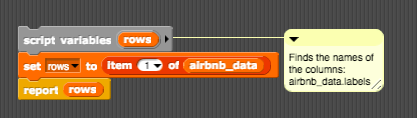 Python has this in-built function to get all the column names: 

In [6]:
airbnb_data.labels

('room_id',
 'host_id',
 'room_type',
 'country',
 'city',
 'neighborhood',
 'reviews',
 'overall_satisfaction',
 'accommodates',
 'bedrooms',
 'bathrooms',
 'price',
 'minstay',
 'latitude',
 'longitude',
 'location')

As you can see, this table has 16 columns. A brief description of some of the columns is given below: 

room_id: A unique number identifying an Airbnb listing

host_id: A unique number identifying an Airbnb host

room_type: One of “Entire home/apt”, “Private room”, or “Shared room”

neighborhood: A subregion of the city or search area where this data is from 

reviews: The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits. Note that such an estimate will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.

overall_satisfaction: The average rating (out of five) that the listing has received from those visitors who left a review.

accommodates: The number of guests a listing can accommodate.

bedrooms: The number of bedrooms a listing offers.

price: The price (in $US) for a night stay

minstay: The minimum stay for a visit, as posted by the host.

latitude and longitude: The latitude and longitude of the listing as posted on the Airbnb site

For the purposes of our analysis we don’t need the columns “country” or “city”. Additionally, two columns don’t have any values. Identify both those columns and then drop those columns as well. 

This is a slightly complicated function in Snap! Since there is no in-built function, we want to select all the items in each row besides the items 4 and 5 of each row (which correspond to the column numbers of 'country' and 'city'). We can do this as below: 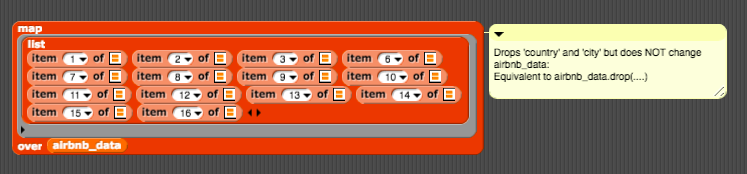

Don't worry if you are confused about how the above Snap! function works, it is a little complicated! Ask a Lab assistant or a TA to help you if you want to understand how it works. 

Luckily, Python has a built-in function that you can use to drop the columns you don’t want from a table using the following command: airbnb_data.drop - Open one bracket and click shift + tab to read the documentation required for the command. 

In [5]:
 airbnb_data = 

SyntaxError: invalid syntax (<ipython-input-5-3bb2008d9e9b>, line 1)

Note: If you just ran “airbnb_data.drop(‘borough’, ‘country’, ‘city’)”, it wouldn’t change the original table “airbnb_data”. This is because it is equivalent to running the above map function without actually setting the variable 'airbnb_data' to what the map function returns. In Snap!, you would do what is shown below to save the 'airbnb_data' value: 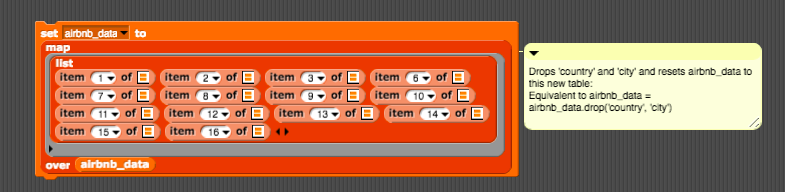 

In Python, it is important to assign “airbnb_data” to the new table using the assignment statement (=) above so that future references to the table don’t have the columns you don’t want. 

Some of the columns have very long names. Relabel three columns (“overall_satisfaction”, “latitude”, and “longitude”) with these new column names (“satisfaction”, “lat” and “long”). In Snap! we would replace the column names (which are the items in the first column of the table) using: 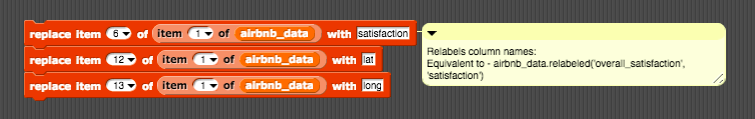 

Python has a built-in function for this purpose. Use the following command for all three columns:

In [7]:
airbnb_data = airbnb_data.relabeled('overall_satisfaction', 'satisfaction')
    
##Do the same for the remaining two columns 

Most data that you find on the internet will often have missing or unusual values which you should usually remove before starting your analysis. One column in the above table has several “xxx” values. To look at the values in one column you can use the command airbnb_data.column (‘Column Name’). While it is possible to write a Snap! script for this, it is unnecessarily complicated so we will stick to using Python commands for this one. Use this command to find the one column which has “xxx” values. Then delete the rows with those values using the command airbnb_data.where(‘Column_Name’,  are.not_equal_to(‘xxx’))

In [ ]:
#Use this cell for scratch work 


In [7]:
Column_with_xxx_vals = … 

#Remove the xxx values 


SyntaxError: invalid character in identifier (<ipython-input-7-7bc645d8bf26>, line 1)

# Data Analysis 

Now that we have cleaned the data, it’s time to explore further.

## Sorting

As a starting point, let's try sorting our data. The SORT function allows us to sort a table by the values in a particular column.

In [20]:
# Sort our table alphabetically by neighborhood
airbnb_data = airbnb_data.sort('neighborhood')
airbnb_data

room_id  | host_id  | room_type       | country | city          | neighborhood | reviews | satisfaction | accommodates | bedrooms | bathrooms | price | minstay | latitude | longitude | location
8404771  | 36471102 | Shared room     | nan     | San Francisco | Bayview      | 0       | 0            | 1            | 1        | nan       | 150   | nan     | 37.7388  | -122.402  | 0101000020E6100000BDC62E51BD995EC063B9A5D590DE4240
19034998 | 43831356 | Shared room     | nan     | San Francisco | Bayview      | 3       | 5            | 1            | 1        | nan       | 45    | nan     | 37.7256  | -122.395  | 0101000020E6100000D15D126745995EC0B189CC5CE0DC4240
17478285 | 40297300 | Shared room     | nan     | San Francisco | Bayview      | 31      | 5            | 2            | 1        | nan       | 59    | nan     | 37.7272  | -122.372  | 0101000020E610000016FBCBEEC9975EC0FBCA83F414DD4240
12110830 | 64946886 | Entire home/apt | nan     | San Francisco | Bayview      | 32      | 4.5          | 3            | 1        | nan       | 90    | nan     | 37.7205  | -122.392  | 0101000020E61000005EBD8A8C0E995EC0249BABE639DC4240
10998637 | 9094897  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 6            | 3        | nan       | 950   | nan     | 37.7116  | -122.389  | 0101000020E6100000D9E89C9FE2985EC0310C587215DB4240
14282647 | 7119658  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 4            | 4        | nan       | 350   | nan     | 37.7398  | -122.386  | 0101000020E6100000397D3D5FB3985EC0E199D024B1DE4240
19348868 | 8371224  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 5            | 2        | nan       | 249   | nan     | 37.7352  | -122.389  | 0101000020E61000009D9CA1B8E3985EC0FE9DEDD11BDE4240
14049725 | 36752    | Entire home/apt | nan     | San Francisco | Bayview      | 14      | 5            | 6            | 2        | nan       | 225   | nan     | 37.7192  | -122.396  | 0101000020E610000068B114C957995EC0BC9179E40FDC4240
10943013 | 56741447 | Entire home/apt | nan     | San Francisco | Bayview      | 13      | 4.5          | 16           | 3        | nan       | 235   | nan     | 37.7383  | -122.386  | 0101000020E61000001E37FC6EBA985EC04162BB7B80DE4240
11025483 | 37743038 | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 6            | 2        | nan       | 300   | nan     | 37.7335  | -122.387  | 0101000020E61000003562669FC7985EC0B6F81400E3DD4240
... (8334 rows omitted)

Notice that the table is now sorted alphabetically by neighborhood. (By default, the SORT function sorts in increasing order.)

Calling SORT on a table does not alter the table. Instead, it returns a new table that is sorted accordingly. By reassigning the variable 'airbnb_data' to the result of calling the SORT function, when we access 'airbnb_data' in the second line, the data is now sorted. If we did not reassign the variable, the sorting would not persist. Consider the following example.

In [21]:
airbnb_data.sort('price') # sort the table by the price column
airbnb_data # the table displayed is still sorted by neighborhood, not by price!

room_id  | host_id  | room_type       | country | city          | neighborhood | reviews | satisfaction | accommodates | bedrooms | bathrooms | price | minstay | latitude | longitude | location
8404771  | 36471102 | Shared room     | nan     | San Francisco | Bayview      | 0       | 0            | 1            | 1        | nan       | 150   | nan     | 37.7388  | -122.402  | 0101000020E6100000BDC62E51BD995EC063B9A5D590DE4240
19034998 | 43831356 | Shared room     | nan     | San Francisco | Bayview      | 3       | 5            | 1            | 1        | nan       | 45    | nan     | 37.7256  | -122.395  | 0101000020E6100000D15D126745995EC0B189CC5CE0DC4240
17478285 | 40297300 | Shared room     | nan     | San Francisco | Bayview      | 31      | 5            | 2            | 1        | nan       | 59    | nan     | 37.7272  | -122.372  | 0101000020E610000016FBCBEEC9975EC0FBCA83F414DD4240
12110830 | 64946886 | Entire home/apt | nan     | San Francisco | Bayview      | 32      | 4.5          | 3            | 1        | nan       | 90    | nan     | 37.7205  | -122.392  | 0101000020E61000005EBD8A8C0E995EC0249BABE639DC4240
10998637 | 9094897  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 6            | 3        | nan       | 950   | nan     | 37.7116  | -122.389  | 0101000020E6100000D9E89C9FE2985EC0310C587215DB4240
14282647 | 7119658  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 4            | 4        | nan       | 350   | nan     | 37.7398  | -122.386  | 0101000020E6100000397D3D5FB3985EC0E199D024B1DE4240
19348868 | 8371224  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 5            | 2        | nan       | 249   | nan     | 37.7352  | -122.389  | 0101000020E61000009D9CA1B8E3985EC0FE9DEDD11BDE4240
14049725 | 36752    | Entire home/apt | nan     | San Francisco | Bayview      | 14      | 5            | 6            | 2        | nan       | 225   | nan     | 37.7192  | -122.396  | 0101000020E610000068B114C957995EC0BC9179E40FDC4240
10943013 | 56741447 | Entire home/apt | nan     | San Francisco | Bayview      | 13      | 4.5          | 16           | 3        | nan       | 235   | nan     | 37.7383  | -122.386  | 0101000020E61000001E37FC6EBA985EC04162BB7B80DE4240
11025483 | 37743038 | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 6            | 2        | nan       | 300   | nan     | 37.7335  | -122.387  | 0101000020E61000003562669FC7985EC0B6F81400E3DD4240
... (8334 rows omitted)

## Accessing and Manipulating Data

### Column and Item
The functions COLUMN and ITEM allow us to select particular columns from a table, and particular values in a column, respectively. 

COLUMN takes as input a string, and returns the column whose label matches the string. This allows us to select a given column from a table. Each column is a list of values. Therefore we can apply functions to a column in order to investigate the data.
    
ITEM takes as input an integer and returns the value at that index in the array.

In [22]:
airbnb_data.column('price') # the output is a list

array([150,  45,  59, ...,  56,  60,  39])

In [19]:
price_list = airbnb_data.column('price') # store the price list
print(price_list.item(2)) # print the price at the 2nd position of the list
print(len(price_list)) # print the length of the price list

59
8344


In [97]:
airbnb_data.column('neighborhood').item(0) # get the 0th item in the neighborhood column

'Bayview'

The above command could have been done in Snap! using this script: 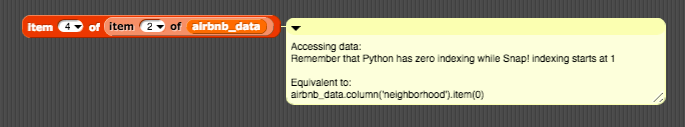

While Snap! has enough functionality to be able to perform most of these commands, Python has in-built libraries which allow you to do it more easily and efficiently. For the remaining functions after this, we will focus on how to use the Python functions. If you are interested in learning how to do this in Snap!, feel free to try it yourself or ask in Lab! 

Now, using both sorting and accessing methods, find the price of the most expensive listing in San Francisco. 
(Hint: Take a look at the documentation for the SORT command to see how to sort in a different order.)

In [18]:
# Find the price of the most expensive listing
top_price = ...

A column is a list of values, and we can apply many different functions to a column in order to gain insight into the data. Using the "np.mean" function, which takes as input a list, find the average price of a listing.

In [76]:
# Find the average price of a listing
avg_price = ...

238.69726749760306

Now that we know what the average price of a listing is, let's try comparing the price of each listing to the average. Using the WITH_COLUMN function, we can append more columns to the end of our table. This is often useful if we want to include additional information in our table. The following example shows how the WITH_COLUMN function can be used.

In [83]:
airbnb_data.with_column('expensive', airbnb_data.column('price')>300)

room_id  | host_id  | room_type       | country | city          | neighborhood | reviews | satisfaction | accommodates | bedrooms | bathrooms | price | minstay | latitude | longitude | location                                           | expensive
8404771  | 36471102 | Shared room     | nan     | San Francisco | Bayview      | 0       | 0            | 1            | 1        | nan       | 150   | nan     | 37.7388  | -122.402  | 0101000020E6100000BDC62E51BD995EC063B9A5D590DE4240 | False
19034998 | 43831356 | Shared room     | nan     | San Francisco | Bayview      | 3       | 5            | 1            | 1        | nan       | 45    | nan     | 37.7256  | -122.395  | 0101000020E6100000D15D126745995EC0B189CC5CE0DC4240 | False
17478285 | 40297300 | Shared room     | nan     | San Francisco | Bayview      | 31      | 5            | 2            | 1        | nan       | 59    | nan     | 37.7272  | -122.372  | 0101000020E610000016FBCBEEC9975EC0FBCA83F414DD4240 | False
12110830 | 64946886 | Entire home/apt | nan     | San Francisco | Bayview      | 32      | 4.5          | 3            | 1        | nan       | 90    | nan     | 37.7205  | -122.392  | 0101000020E61000005EBD8A8C0E995EC0249BABE639DC4240 | False
10998637 | 9094897  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 6            | 3        | nan       | 950   | nan     | 37.7116  | -122.389  | 0101000020E6100000D9E89C9FE2985EC0310C587215DB4240 | False
14282647 | 7119658  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 4            | 4        | nan       | 350   | nan     | 37.7398  | -122.386  | 0101000020E6100000397D3D5FB3985EC0E199D024B1DE4240 | False
19348868 | 8371224  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 5            | 2        | nan       | 249   | nan     | 37.7352  | -122.389  | 0101000020E61000009D9CA1B8E3985EC0FE9DEDD11BDE4240 | False
14049725 | 36752    | Entire home/apt | nan     | San Francisco | Bayview      | 14      | 5            | 6            | 2        | nan       | 225   | nan     | 37.7192  | -122.396  | 0101000020E610000068B114C957995EC0BC9179E40FDC4240 | False
10943013 | 56741447 | Entire home/apt | nan     | San Francisco | Bayview      | 13      | 4.5          | 16           | 3        | nan       | 235   | nan     | 37.7383  | -122.386  | 0101000020E61000001E37FC6EBA985EC04162BB7B80DE4240 | False
11025483 | 37743038 | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 6            | 2        | nan       | 300   | nan     | 37.7335  | -122.387  | 0101000020E61000003562669FC7985EC0B6F81400E3DD4240 | False
... (8334 rows omitted)

In this example, we started with our table and added an additional column labeled "expensive" which contains boolean values, based on whether or not the price of a listing is above $300 or not. Notice that because we did not reassign airbnb_data to the result of the call, our change is not saved. If we access airbnb_data now, the "expensive" column will not be shown.

Now, add a column to the table, labeled "diff from avg" that shows by how much the price of a listing is away from the average price. (Hint: The np.abs function might be helpful.)

Then, once you have added this column, add another column to the table, labeled "near avg" that is True if the listing is within 50 dollars of the average, and False otherwise.

In [99]:
# Add the difference from average column to the table
airbnb_data = ...


room_id  | host_id  | room_type       | country | city          | neighborhood | reviews | satisfaction | accommodates | bedrooms | bathrooms | price | minstay | latitude | longitude | location                                           | diff from avg | near avg
8404771  | 36471102 | Shared room     | nan     | San Francisco | Bayview      | 0       | 0            | 1            | 1        | nan       | 150   | nan     | 37.7388  | -122.402  | 0101000020E6100000BDC62E51BD995EC063B9A5D590DE4240 | 88.6973       | False
19034998 | 43831356 | Shared room     | nan     | San Francisco | Bayview      | 3       | 5            | 1            | 1        | nan       | 45    | nan     | 37.7256  | -122.395  | 0101000020E6100000D15D126745995EC0B189CC5CE0DC4240 | 193.697       | False
17478285 | 40297300 | Shared room     | nan     | San Francisco | Bayview      | 31      | 5            | 2            | 1        | nan       | 59    | nan     | 37.7272  | -122.372  | 0101000020E610000016FBCBEEC9975EC0FBCA83F414DD4240 | 179.697       | False
12110830 | 64946886 | Entire home/apt | nan     | San Francisco | Bayview      | 32      | 4.5          | 3            | 1        | nan       | 90    | nan     | 37.7205  | -122.392  | 0101000020E61000005EBD8A8C0E995EC0249BABE639DC4240 | 148.697       | False
10998637 | 9094897  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 6            | 3        | nan       | 950   | nan     | 37.7116  | -122.389  | 0101000020E6100000D9E89C9FE2985EC0310C587215DB4240 | 711.303       | False
14282647 | 7119658  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 4            | 4        | nan       | 350   | nan     | 37.7398  | -122.386  | 0101000020E6100000397D3D5FB3985EC0E199D024B1DE4240 | 111.303       | False
19348868 | 8371224  | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 5            | 2        | nan       | 249   | nan     | 37.7352  | -122.389  | 0101000020E61000009D9CA1B8E3985EC0FE9DEDD11BDE4240 | 10.3027       | True
14049725 | 36752    | Entire home/apt | nan     | San Francisco | Bayview      | 14      | 5            | 6            | 2        | nan       | 225   | nan     | 37.7192  | -122.396  | 0101000020E610000068B114C957995EC0BC9179E40FDC4240 | 13.6973       | True
10943013 | 56741447 | Entire home/apt | nan     | San Francisco | Bayview      | 13      | 4.5          | 16           | 3        | nan       | 235   | nan     | 37.7383  | -122.386  | 0101000020E61000001E37FC6EBA985EC04162BB7B80DE4240 | 3.69727       | True
11025483 | 37743038 | Entire home/apt | nan     | San Francisco | Bayview      | 0       | 0            | 6            | 2        | nan       | 300   | nan     | 37.7335  | -122.387  | 0101000020E61000003562669FC7985EC0B6F81400E3DD4240 | 61.3027       | False
... (8334 rows omitted)

###  Select and Where

If we want to create a new table from a particular set of columns in our current table, we can accomplish this using the SELECT function, as demonstrated below. Once again, the SELECT function does not affect the table it's called from. Instead it returns a new table containing only the specified columns.

In [101]:
# Create a new table of the room ID and the price of the room.
room_to_price = airbnb_data.select('room_id', 'price')
room_to_price

room_id  | price
8404771  | 150
19034998 | 45
17478285 | 59
12110830 | 90
10998637 | 950
14282647 | 350
19348868 | 249
14049725 | 225
10943013 | 235
11025483 | 300
... (8334 rows omitted)

What if we only want to select some of the data, for example only those rooms that have a price within a certain range? The WHERE function allows us to return a table consisting of the same columns as the starting table, but with only those rows that satisfy a given condition. This could be done by using a combination of HOFs like "keep" and "map" in Snap! 

The first argumet to WHERE is the label of a particular column. The second argument is a condition. For each row, if the value in the column specified by the first argument satisfies the condition, the row is included in the returned table. If it does not satisfy the condition, the row is excluded.

The following example creates a table consisting of listings in the Financial District.

In [102]:
# Return only those rows in the Financial District neighborhood
airbnb_data.where('neighborhood', are.equal_to('Financial District'))

room_id  | host_id  | room_type   | country | city          | neighborhood       | reviews | satisfaction | accommodates | bedrooms | bathrooms | price | minstay | latitude | longitude | location                                           | diff from avg | near avg
259622   | 329072   | Shared room | nan     | San Francisco | Financial District | 125     | 4.5          | 4            | 1        | nan       | 90    | nan     | 37.7944  | -122.405  | 0101000020E6100000E9B7AF03E7995EC0C4CE143AAFE54240 | 148.697       | False
785901   | 329072   | Shared room | nan     | San Francisco | Financial District | 78      | 4.5          | 4            | 1        | nan       | 90    | nan     | 37.7931  | -122.404  | 0101000020E610000074232C2AE2995EC0EC51B81E85E54240 | 148.697       | False
786506   | 329072   | Shared room | nan     | San Francisco | Financial District | 83      | 4.5          | 4            | 1        | nan       | 90    | nan     | 37.7926  | -122.403  | 0101000020E6100000AD174339D1995EC030F488D173E54240 | 148.697       | False
12857222 | 329072   | Shared room | nan     | San Francisco | Financial District | 26      | 4.5          | 4            | 1        | nan       | 90    | nan     | 37.793   | -122.403  | 0101000020E610000049A0C1A6CE995EC0FF243E7782E54240 | 148.697       | False
13636171 | 33663709 | Shared room | nan     | San Francisco | Financial District | 0       | 0            | 2            | 1        | nan       | 41    | nan     | 37.7922  | -122.394  | 0101000020E6100000C6FA062637995EC0BF6378EC67E54240 | 197.697       | False
16606328 | 4582815  | Shared room | nan     | San Francisco | Financial District | 26      | 4.5          | 2            | 1        | nan       | 85    | nan     | 37.7846  | -122.4    | 0101000020E61000007E3672DD94995EC0C7F319506FE44240 | 153.697       | False
12857179 | 329072   | Shared room | nan     | San Francisco | Financial District | 17      | 4.5          | 4            | 1        | nan       | 45    | nan     | 37.7947  | -122.403  | 0101000020E6100000D13B1570CF995EC030D63730B9E54240 | 193.697       | False
786492   | 329072   | Shared room | nan     | San Francisco | Financial District | 76      | 4.5          | 4            | 1        | nan       | 45    | nan     | 37.7942  | -122.403  | 0101000020E6100000A9F6E978CC995EC05C1C959BA8E54240 | 193.697       | False
229240   | 329072   | Shared room | nan     | San Francisco | Financial District | 204     | 4.5          | 4            | 1        | nan       | 45    | nan     | 37.7934  | -122.403  | 0101000020E61000004D0F0A4AD1995EC0221807978EE54240 | 193.697       | False
12853799 | 329072   | Shared room | nan     | San Francisco | Financial District | 25      | 4.5          | 4            | 1        | nan       | 45    | nan     | 37.7935  | -122.403  | 0101000020E6100000DDB5847CD0995EC0699082A790E54240 | 193.697       | False
... (129 rows omitted)

For each of the following, use a where command to select the appropriate listings.

1. Find all listings that have a price greater than or equal to $500

2. Find all listings in the Mission neighborhood that have a price less than or equal to $1000.

3. Find all listings with latitude values between 37.76 and 37.78, and longitude values between -122.50 and -122.47.

4. Find all listings with an average rating of at least 4, and more than 10 total reviews.

In [3]:
# Question 1

In [4]:
# Question 2

In [5]:
# Question 3

In [6]:
# Question 4

### Data Visualization 

Aside from using traditional analysis techniques by manipulating the table, we can also analyze the data visually.  First, let’s see the average distribution of prices for a one night stay in an Airbnb in San Francisco. 

Use the Table.bar(‘column name’) command to plot a bar chart of average prices per night. You can find the documentation here - http://data8.org/datascience/_autosummary/datascience.tables.Table.bar.html#datascience.tables.Table.bar. 

In [6]:
##Plot a bar chart 



Based on your findings, what is the most common range or prices in the city? 

Another interesting thing to look at would be whether price of a one night stay at an Airbnb location is related to the satisfaction of previous guests at that location. First, create a new table with only those two columns using the following command: 

In [ ]:
scatter_table = airbnb_data.select(‘overall_satisfaction’, ‘price’) 

Then use this new table to plot a scatter plot using scatter_table.scatter(‘price’). 

In [ ]:
##Draw a scatter plot here 


What do your results show? Is price related to average ratings of previous guests? 

# Explore

Now it's your turn to explore a data set from scratch. The file - titanic_data.csv is a list of passengers on the Titanic. Using this dataset, answer the following questions.

1. What percent of passengers onboard the Titanic survived?
2. How did the class of a passenger affect their chance of survival?


# Conclusion 

Congrats on getting an idea of what data science looks like! As you saw with this lab, it may be useful for Airbnb hosts to use this data to see what price they can charge or if rooms in specific location in SF may be more popular than others. As more and more data is becoming available to us, all businesses and organizations have started using data analytics to streamline their operations, maximize profits etc. so it is a very applicable field that uses computer science. 